# Python Boot Camp 6 Solution:

This is a continuation of [Python Boot Camp 5](python_boot_camp_5.ipynb). Based on [MATLAB Onramp](https://matlabacademy.mathworks.com)

## Challenge Problem 2: Batch Reactor with the Modified Euler's method

The material balance for a power law reaction in a batch reactor can be written as:

$$ \frac{dC}{dt}=-kC^n $$

where $n$ can take any value greater than or equal to 0. We'll use the **modified Euler's method** to predict time to reaction completion for any value of $k$ or $n$.

### Getting Started
Run the code cell below to get started.

In [1]:
from pylab import *

## The Modified Euler method

In the modified Euler method, we step through an integration $y=\int{f(t)}dt$ with step size $\Delta t$, by calculating the value of $y$ at the next step, $y_{i+1}$, from the value at the current step, $y_i$, in two stages.

First, calculate an "initial estimate" value, $\tilde{y}_{i+1}$:

$$ \tilde{y}_{i+1} = y_i + \Delta t f(t_i,y_i) $$

Then use the values of $y_i$ and $\tilde{y}_{i+1}$ to estimate $y_{i+1}$:

$$  y_{i+1} = y_i + \frac{\Delta t}{2}\left[ f(t_i,y_i) + f(t_{i+1}, \tilde{y}_{i+1}) \right ]$$

where $\tilde{y}_{i+1}$ is an initial estimate at the next value of $y$, and $f(t,y)$ is the expression for the first derivative of $y$, $\frac{dy}{dt}=f(t,y)$.

## Parameters

Let's start by defining some parameters.  These variables will be available to the functions and loops that we write below.

In [2]:
C0 = 0.1 # mol/L
k = 0.52  # dimensions depend on n.  for n=1: /min   for n=2: L/min/mol
n = 1.5  
dt = 0.1  # min
tmax = 100  # min

## Derivative function
Write a function `f(t,C)` that will return $\frac{dC}{dt}$ for any value of $t$ and $C$. Check the function for $t=0$ and $C=C_0$.

In [3]:
def f(t,C):
    return -k*C**n

f(0, C0)

-0.016443843832875577

## Time array
Using the `arange` function, make a numpy array `t` of time values starting at $t=0$ and ending at `tmax`, with step size `dt`. Remember that the second argument of `arange` is the first *excluded* value.

Then, make an array `C` with the same size as `t`, and with the `0th` value set to `C0`. *Hint: use the function `np.zeros_like()`* Use the same process to make an array `C_est` for the estimated value $\tilde{C}$.

In [4]:
t=arange(0,tmax+dt,dt)
C=zeros_like(t)
C[0]=C0

## Time loop

Now we implement the modified euler's equation in a loop using our function. We want to loop over all but the last value of `t`, so we use `t[:-1]`. The result of the  calculation is placed in `C[i+1]`, so we will need to access the indices of `t` using `enumerate()`. The "initial estimate" is provided; add the remaining calculation for the modified Euler's equation.

### Modified Euler Method

In [5]:
for i, ti in enumerate(t[:-1]):
    C_est  = C[i] + dt * f(ti, C[i])  # euler method
    C[i+1] = C[i] + dt * 0.5*(f(ti, C[i]) + f(t[i+1], C_est))

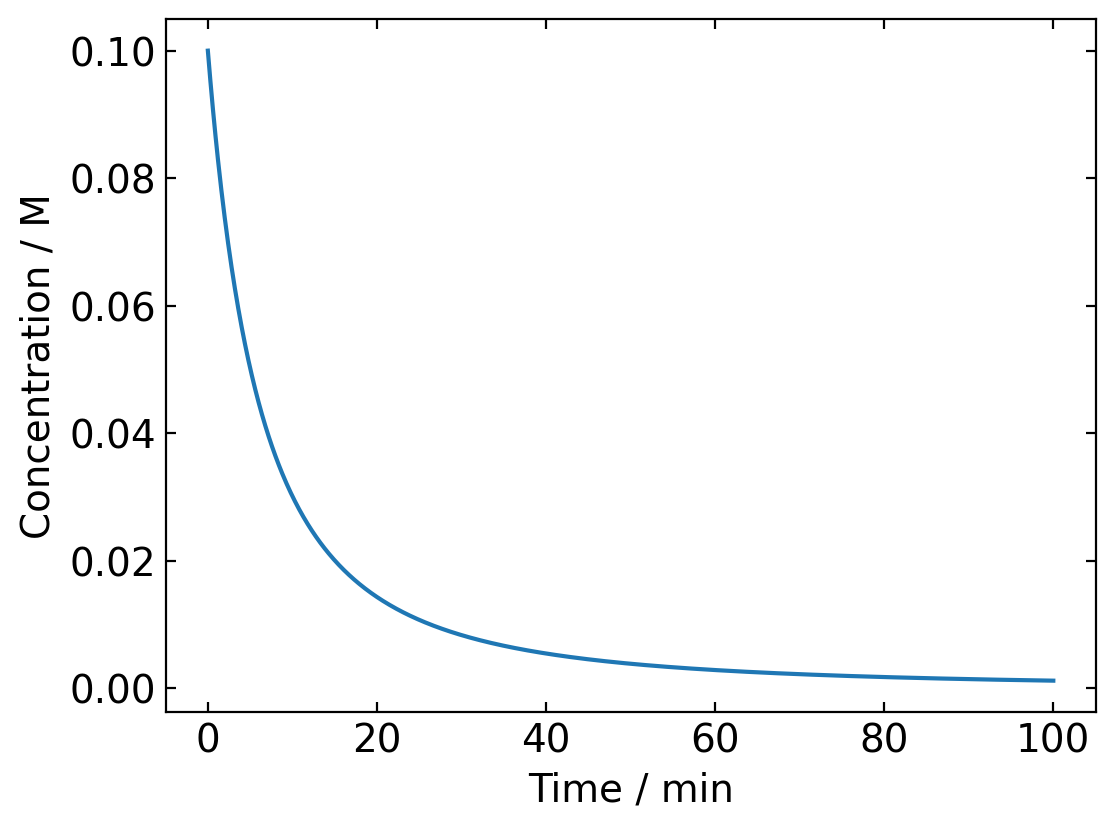

In [6]:
plot(t,C)
xlabel('Time / min')
ylabel('Concentration / M')
show()

## Time to reaction completion
Lastly, we want to caluclate the time it takes for the reaction to go to completion.  Let's say that the reaction is complete when only 5% of the reactant remains. How long does that take?

In [7]:
t_complete = t[C <= 0.05*C0]
min(t_complete)  # minutes

42.300000000000004

## Further Practice

There's a lot more we can do with this model:

 - Change the parameter values to see how the result changes. What happens for `n=0`?
 - The differential equation can be solve analytically, using separation of variables, for some values of `n`. How does the analytical solution compare to the numerical result?
 - Are there any combination of parameter values for which the reaction never goes to completion?

When finished, be sure to do **"Kernel" > "Restart and Run All"** to be sure everything runs correctly.

<hr style="height:4px;border-width:0;color:gray;background-color:gray">

This is the end of **Python Boot Camp 6**. Be sure to save by pressing `^S` (Windows) or `⌘S` (Mac). Then, print this notebook as a PDF, using the "Print" command in Jupyterlab's "File" menu, and submit on [D2L](https://d2l.msu.edu).